In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#%matplotlib inline


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
dataset_dir='/Users/kiruthikasekar/Workspace/workshop/datasets/'

In [5]:
# read the dataset
dataset = pd.read_csv(dataset_dir+'User_Data_LG.csv') 
dataset
dataset.shape
dataset.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


(400, 5)

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
# Splitting Dependent and Independent Variables
# input 
x = dataset.iloc[:, [2, 3]].values 
  
# output 
y = dataset.iloc[:, 4].values

In [8]:
# Splitting training and testing data
xtrain, xtest, ytrain, ytest = train_test_split( 
        x, y, test_size = 0.25, random_state = 0) 

In [12]:
# Scaling the data range 
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest) 
# printing scaled data
print (xtrain[0:10, :]) 

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [15]:
# Create a Logistic Classifier
classifier = LogisticRegression(solver='lbfgs',random_state = 0) 
classifier.fit(xtrain, ytrain) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# predict values
y_pred.shape
y_pred = classifier.predict(xtest) 

(100,)

In [21]:
# performance measure by confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [20]:
# getting the accuracy score 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.89


(-2.9931891594584856, 3.1568108405413833)

(-2.582542447755475, 3.327457552244399)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Classifier (Test set)')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Estimated Salary')

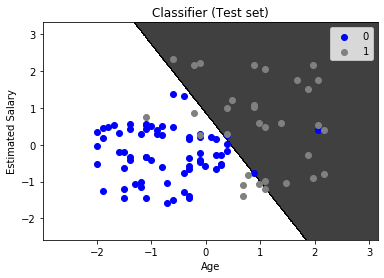

In [24]:
# Plot the classifier 
from matplotlib.colors import ListedColormap 
X_set, y_set = xtest, ytest 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,  
                               stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1,  
                               stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict( 
             np.array([X1.ravel(), X2.ravel()]).T).reshape( 
             X1.shape), alpha = 0.75, cmap = ListedColormap(('white', 'black'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('blue', 'grey'))(i), label = j) 
      
plt.title('Classifier (Test set)') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show() 